# implemention of a deep neural network with its Hyperparameter

In [1]:
import numpy as np 

In [2]:
class DeepNeuralNet:

    def __init__(self,input_size,hidden_size,output_size,Lambda=0.05,learning_rate=0.001,epoches=1000,hidden_layer=1):

        """initialization of parameters """
        self.input_size = input_size # number of parameters 
        self.hidden_size = hidden_size # number of neurons in hidden layers 
        self.output_size = output_size # size of output 
        self.Lambda = Lambda # for regularization 
        self.learning_rate = learning_rate # learning rate 
        self.epoches = epoches # number of iterations 
        self.hidden_layer = hidden_layer # number of hidden layer 
        
        """initialization of hidden layers"""

        self.HW = [np.random.randn(self.input_size,self.hidden_size)]
        self.HB = [np.zeros((1,self.hidden_size))] 

        for layers in range(self.hidden_layer): # iterativly add new hidden layer parameters
            self.HW.append(np.random.randn(self.hidden_size,self.hidden_size))
            self.HB.append(np.zeros((1,self.hidden_size)))
        
        """initialization of Output layer"""

        self.OW = np.random.randn(self.hidden_size,self.output_size)
        self.OB = np.zeros((1,self.output_size))


    def sigmoid(self,z):
        return 1 / (1+np.exp(-z)) 
    
    def derivative_sigmoid(self,z):
        s = self.sigmoid(z) 
        return s * (1-s)
    
    def Relu(self,z):
        return np.maximum(0,z)
    
    def derivative_relu(self,z):
        return (z>0).astype(float)
    
    def compute_loss(self,preds,Y):
        preds = np.clip(preds, 1e-8, 1 - 1e-8)
        return -np.mean(Y*np.log(preds)+(1-Y)*np.log(1-preds))
    
    def ForwardPropagation(self,X):
        A = X 
        self.HZ = []
        self.HA = [A]

        """moving deep inside neural networks,calculation from 1 to L-1 layers """
        for l in range(self.hidden_layer):
            Z = np.dot(A,self.HW[l]) + self.HB[l] 
            self.HZ.append(Z)
            A = self.Relu(Z)
            self.HA.append(A)

        """Calculation for Output layer """ 
        self.OZ = np.dot(self.HA[-1],self.OW) + self.OB 
        self.OA = self.sigmoid(self.OZ)

        return self.OA 
    
    def BackwardPropagation(self,X,Y):
        m = X.shape[0]
        error = self.OA - Y 

        """Moving Backward from output layer"""
        DOW = 1/m * np.dot(self.HA[-1].T,error) + self.Lambda * self.OW
        DOB = 1/m * np.sum(error,axis=0,keepdims=True)

        self.OW = self.OW - self.learning_rate * DOW 
        self.OB = self.OB - self.learning_rate * DOB 

        """moving backward in hidden layers"""
        for l in reversed(range(self.hidden_layer)):
            DA = np.dot(error,self.OW.T if l == self.hidden_layer-1 else self.HW[l+1].T)
            DZ = DA * self.derivative_relu(self.HZ[l]) 
            DW = 1/m * np.dot(self.HA[l].T,DZ) + self.Lambda * self.HW[l]
            DB = 1/m * np.sum(DZ,axis=0,keepdims=True)

            error = DZ 
            self.HW[l] = self.HW[l] - self.learning_rate * DW 
            self.HB[l] = self.HB[l] - self.learning_rate * DB 


    def fit(self,X,Y):
        Y = np.array(Y).reshape(-1,1)

        for epoch in range(self.epoches):
            pred = self.ForwardPropagation(X)
            loss = self.compute_loss(pred,Y)
            print(f"epoch : {epoch}, loss = {loss}") 
            self.BackwardPropagation(X,Y) 
            
    def predict(self,X):
        return (self.ForwardPropagation(X) > 0.5).astype(int)

In [4]:
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd 
dataset = pd.read_csv("../BankNote_Authentication.csv")
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
Y = dataset['class']
X = dataset.drop(columns=['class'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [6]:
model = DeepNeuralNet(
    input_size=4,
    hidden_size=16,
    output_size=1,
    Lambda=0.05,
    learning_rate=0.001,
    epoches=1000,
    hidden_layer=4
)

model.fit(X_train,Y_train)
preds = model.predict(X_test)

D:\Temp\ipykernel_11112\21932106.py:30: RuntimeWarning: overflow encountered in exp
  return 1 / (1+np.exp(-z))


epoch : 0, loss = 8.977503919228614
epoch : 1, loss = 9.62922795844302
epoch : 2, loss = 8.68936079389877
epoch : 3, loss = 8.113153945863093
epoch : 4, loss = 6.7578193524932475
epoch : 5, loss = 6.0637761540218476
epoch : 6, loss = 5.460168171848019
epoch : 7, loss = 5.346983767716589
epoch : 8, loss = 5.135448055201728
epoch : 9, loss = 5.148146776903617
epoch : 10, loss = 4.934975044133387
epoch : 11, loss = 4.7836710688083794
epoch : 12, loss = 4.496064583569796
epoch : 13, loss = 4.1753226747529135
epoch : 14, loss = 3.8109560429074105
epoch : 15, loss = 3.3947377913464414
epoch : 16, loss = 3.100379307132725
epoch : 17, loss = 2.8167121665845
epoch : 18, loss = 2.5565963408969594
epoch : 19, loss = 2.3842425802508167
epoch : 20, loss = 2.197385721738968
epoch : 21, loss = 2.058139921943681
epoch : 22, loss = 1.916981611579445
epoch : 23, loss = 1.8513540120025478
epoch : 24, loss = 1.7567952174206787
epoch : 25, loss = 1.6678724711628194
epoch : 26, loss = 1.5687027479677667
epo

In [54]:
Y_test = np.array(Y_test).reshape(-1,1)
Y_test.shape

(343, 1)

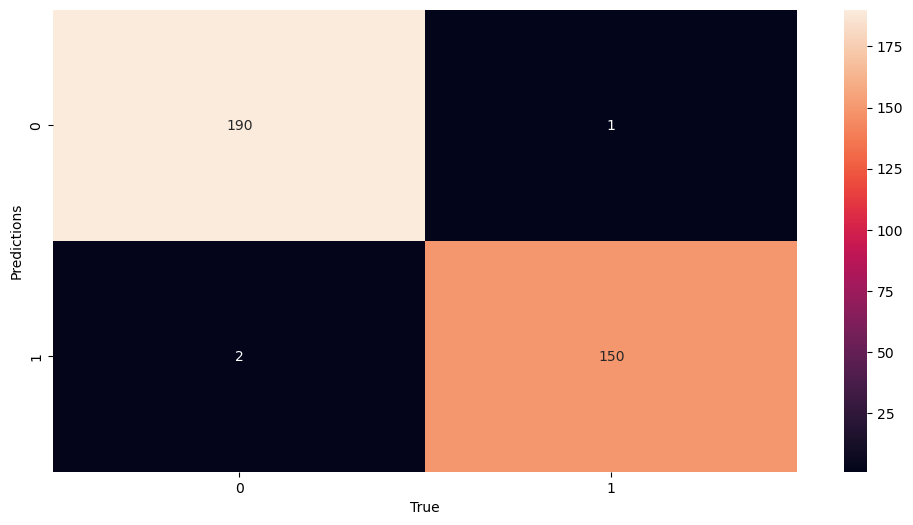

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       191
           1       0.99      0.99      0.99       152

    accuracy                           0.99       343
   macro avg       0.99      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [7]:
from sklearn.metrics import classification_report
cmf = confusion_matrix(Y_test,preds)

plt.figure(figsize=(12,6))
sns.heatmap(cmf,annot=True,fmt='d')
plt.xlabel("True")
plt.ylabel("Predictions")
plt.show()
print(classification_report(Y_test,preds))
